# Import Statements

In [35]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats
sns.set_style("whitegrid")
sns.color_palette("magma", as_cmap=True)
import matplotlib.pyplot as plt

# Preliminary Data Processing

### 1.Understanding the shape of data 

In [36]:
Crimes=pd.read_csv('Crimes.csv', engine = 'c')
Crimes.shape

(7299208, 22)

In [37]:
Census=pd.read_csv('Census.csv', engine = 'c')
Census.shape

(78, 9)

### 2. Understanding various data types

In [38]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299208 entries, 0 to 7299207
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [39]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


### 3. Sample ucleaned data

In [40]:
Census.head(10)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [41]:
Crimes.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,03,1155536.0,1900515.0,2015,02/10/2018 03:50:01 PM,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN


### 2. Removing duplicate columns of longitude and latitude 

In [42]:
Crimes.drop(['Latitude','Longitude'],axis=1,inplace=True)
Crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


### 3.Replacing spaces in the column headers and converting to lower case

In [43]:
Census.columns = Census.columns.str.replace(' ', '')
Census.columns = Census.columns.str.lower()
Census.head()

,communityareanumber,communityareaname,percentofhousingcrowded,percenthouseholdsbelowpoverty,percentaged16+unemployed,percentaged25+withouthighschooldiploma,percentagedunder18orover64,percapitaincome,hardshipindex
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [44]:
Crimes.columns = Crimes.columns.str.replace(' ', '')
Crimes.columns = Crimes.columns.str.lower()
Crimes.head()

,id,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,domestic,beat,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


### 4.Checking for missing values in the data 

In [ ]:
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(Crimes.isnull(), cbar = False,cmap="viridis")
plt.show()

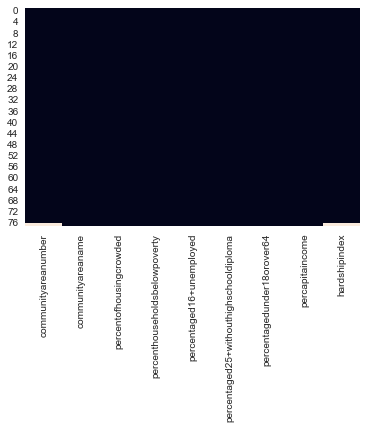

In [46]:
sns.heatmap(Census.isnull(), cbar = False)
plt.show()

### 5. Removing missing values from the dataset

In [ ]:
Crimes=Crimes.dropna()
plt.figure(figsize=(7,7))
sns.heatmap(Crimes.isnull(), cbar = False)
plt.show()

In [ ]:
Census=Census.dropna()
sns.heatmap(Census.isnull(), cbar = False)
plt.show()

### 6.Conversion of Date Time to python's DateTime format

In [ ]:
Crimes.date=pd.to_datetime(Crimes.date,format='%m/%d/%Y %I:%M:%S %p')
Crimes.index = pd.DatetimeIndex(Crimes.date)

### 7. Dropping unwanted columns

In [ ]:
Crimes=Crimes.drop(["casenumber", "domestic", "beat"], 1)
Crimes.head()

# Saving the cleaned datasets

In [ ]:
Crimes.to_csv("CleanedFiles/Crimes_Data_Cleaned.csv")
Census.to_csv("CleanedFiles/Census_Data_Cleaned.csv")